In [1]:
# Imports

import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

import pickle

In [2]:
full_df = pd.read_csv("../../Data/creditcard.csv")
full_df.drop(columns='Time', inplace=True)

In [3]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

fraud_df2 = fraud_df.copy()
fraud_df3 = fraud_df.copy()

fraud_dfs = [fraud_df, fraud_df2, fraud_df3]

triple_fraud_df = pd.concat(fraud_dfs, ignore_index=True)

In [4]:
not_fraud_df = full_df.loc[full_df['Class']==0]
not_fraud_df = not_fraud_df.sample(n=1476, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [5]:
new_df = not_fraud_df.append(triple_fraud_df, ignore_index=True)

In [6]:
new_df.shape

(2952, 30)

In [7]:
target = new_df["Class"]
target_names = ["negative", "positive"]

In [8]:
data = new_df.drop("Class", axis=1)
feature_names = data.columns
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,-0.332990,...,1.031270,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00
1,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,-0.551040,...,-0.299226,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89
2,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,-0.737621,...,-0.073391,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99
3,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,-0.097356,...,-0.106821,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80
4,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,-0.521974,...,-0.013126,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48


In [9]:
target.shape

(2952,)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [11]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [12]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [13]:
#save
#filename = 'fraud_model2scaled.sav'
#model = pickle.load(open(filename, 'rb'))

In [14]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.924


In [15]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.89      0.98      0.93       385
    positive       0.97      0.87      0.92       353

    accuracy                           0.92       738
   macro avg       0.93      0.92      0.92       738
weighted avg       0.93      0.92      0.92       738



In [16]:
#open saved file
#pickle.dump(model, open(filename, 'wb'))

In [17]:
# Save and load temporarily
np.save('datasv.npy', (X_train_scaled, X_test_scaled, y_train, y_test))
X_train_scaled, X_test_scaled, y_train, y_test = np.load('datasv.npy', allow_pickle=True)

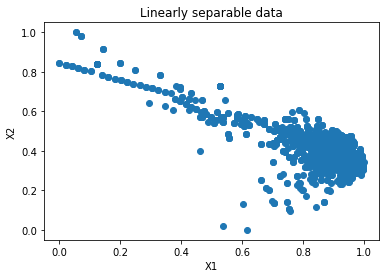

In [18]:
# Generate scatter plot for training data
fig, ax = plt.subplots( nrows=1, ncols=1 )
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
fig.savefig('3x2_ScaledData.png')

In [19]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [20]:
# Fit data
clf = clf.fit(X_train_scaled, y_train)

In [21]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[  31   39   42   66   86   94   95  116  118  122  133  134  140  141
  145  150  164  196  205  241  242  254  259  270  272  275  276  289
  290  293  298  308  338  339  367  375  381  382  392  416  419  428
  431  437  452  457  469  471  498  520  533  548  555  569  575  579
  582  606  607  645  652  657  665  673  682  688  712  739  740  770
  778  781  805  823  876  897  938  945  951  972  977  989  993 1011
 1027 1029 1062 1065 1068 1079 1086 1097 1099 1120 1123 1140 1152 1158
 1159 1189 1205 1206 1219 1222 1225 1236 1254 1274 1292 1306 1307 1319
 1323 1327 1334 1343 1363 1366 1376 1380 1384 1386 1391 1411 1442 1443
 1472 1474 1501 1524 1528 1545 1568 1577 1582 1587 1596 1597 1605 1627
 1631 1654 1664 1673 1677 1685 1690 1696 1704 1708 1714 1723 1724 1728
 1730 1735 1737 1747 1762 1768 1774 1781 1782 1786 1789 1812 1813 1829
 1844 1848 1862 1874 1880 1901 1910 1921 1926 1932 1938 1946 1963 1973
 1993 1994 2014 2028 2040 2050 2077 2093 2099 2106 2121 2124 2127 2140
 2144 

In [22]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[202 197]


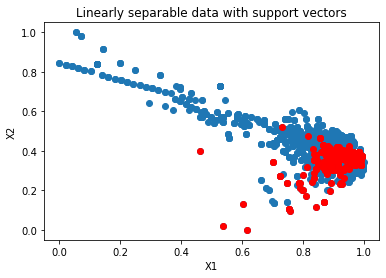

In [23]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
fig2, ax = plt.subplots( nrows=1, ncols=1 )
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
fig2.savefig('3x2_ScaledDataWithVectors.png')